# Semantic Segmentation


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import cv2

from tensorflow.python.keras import Model
from tensorflow.python.keras.layers import Input, Conv2D, MaxPooling2D, Conv2DTranspose, Concatenate, Dropout

In [2]:
main_path = "/content/drive/MyDrive/landai/images"
image_names = []

for i in os.listdir(main_path):
  image_names.append(os.path.join(main_path,i))
  
image_names.sort()

In [3]:
mask_path = "/content/drive/MyDrive/landai/masks"
mask_names = []

for i in os.listdir(mask_path):
  mask_names.append(os.path.join(mask_path,i))
  
mask_names.sort()

In [4]:
images=[]

for i in image_names:
  images.append(cv2.imread(i,1))

images = np.array(images)

In [5]:
masks=[]

for i in mask_names:
  masks.append(cv2.imread(i,1))

masks = np.array(masks)

In [6]:
masks = masks[:,:,:,:1]

In [7]:
masks.shape

(150, 512, 512, 1)

In [8]:
x_train = images[:120]
x_test = images[120:]
y_train = masks[:120]
y_test = masks[120:]


In [9]:
y_train_1hot = tf.keras.utils.to_categorical(y_train)
y_test_1hot = tf.keras.utils.to_categorical(y_test)

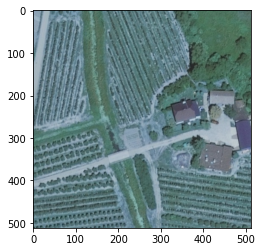

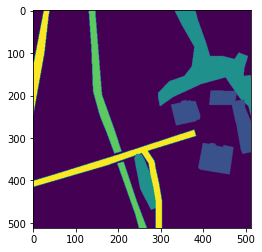

In [10]:
plt.imshow(x_test[10,:,:,:].astype('uint8'))
plt.show()

plt.imshow(y_test[10,:,:,0].astype('uint8'))
plt.show()

In [11]:
y_test_1hot.shape

(30, 512, 512, 5)

In [38]:
x_in = Input(shape=(512, 512, 3))

x_temp = Conv2D(32, (3, 3), activation='relu', padding='same')(x_in)
x_temp = Dropout(0.25)(x_temp)
x_skip1 = Conv2D(32, (3, 3), activation='relu', padding='same')(x_temp)
x_temp = MaxPooling2D((2,2))(x_skip1)
x_temp = Conv2D(32, (3, 3), activation='relu', padding='same')(x_temp)
x_temp = Dropout(0.25)(x_temp)
x_skip2 = Conv2D(32, (3, 3), activation='relu', padding='same')(x_temp)
x_temp = MaxPooling2D((2,2))(x_skip2)
x_temp = Conv2D(64, (3, 3), activation='relu', padding='same')(x_temp)
x_temp = Dropout(0.25)(x_temp)
x_skip3 = Conv2D(64, (3, 3), activation='relu', padding='same')(x_temp)
x_temp = MaxPooling2D((2,2))(x_skip3)
x_temp = Conv2D(64, (3, 3), activation='relu', padding='same')(x_temp)
x_temp = Dropout(0.5)(x_temp)
x_temp = Conv2D(64, (3, 3), activation='relu', padding='same')(x_temp)

x_temp = Conv2DTranspose(64, (3, 3), activation='relu',  padding='same')(x_temp)
x_temp = Dropout(0.5)(x_temp)
x_temp = Conv2DTranspose(64, (3, 3), strides=(2, 2), activation='relu',  padding='same')(x_temp)
x_temp = Concatenate()([x_temp, x_skip3])
x_temp = Conv2DTranspose(64, (3, 3), activation='relu',  padding='same')(x_temp)
x_temp = Dropout(0.5)(x_temp)
x_temp = Conv2DTranspose(64, (3, 3), strides=(2, 2), activation='relu',  padding='same')(x_temp)
x_temp = Concatenate()([x_temp, x_skip2])
x_temp = Conv2DTranspose(32, (3, 3), activation='relu',  padding='same')(x_temp)
x_temp = Dropout(0.5)(x_temp)
x_temp = Conv2DTranspose(32, (3, 3), strides=(2, 2), activation='relu',  padding='same')(x_temp)
x_temp = Concatenate()([x_temp, x_skip1])
x_temp = Conv2DTranspose(32, (3, 3), activation='relu',  padding='same')(x_temp)
x_temp = Dropout(0.5)(x_temp)
x_temp = Conv2DTranspose(32, (3, 3), activation='relu',  padding='same')(x_temp)

x_temp = Conv2D(32, (1, 1), activation='relu', padding='same')(x_temp)
x_temp = Conv2D(32, (1, 1), activation='relu', padding='same')(x_temp)
x_out = Conv2D(5, (1, 1), activation='softmax', padding='same')(x_temp)

model = Model(inputs=x_in, outputs=x_out)

model.compile(loss='categorical_crossentropy', optimizer='adam')


In [39]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 512, 512, 3) 0                                            
__________________________________________________________________________________________________
conv2d_11 (Conv2D)              (None, 512, 512, 32) 896         input_2[0][0]                    
__________________________________________________________________________________________________
dropout_8 (Dropout)             (None, 512, 512, 32) 0           conv2d_11[0][0]                  
__________________________________________________________________________________________________
conv2d_12 (Conv2D)              (None, 512, 512, 32) 9248        dropout_8[0][0]                  
____________________________________________________________________________________________

## Modelin eğitilmesi

In [40]:
history = model.fit(x_train, y_train_1hot, validation_data=(x_test, y_test_1hot), epochs=10, batch_size=10, verbose=0)

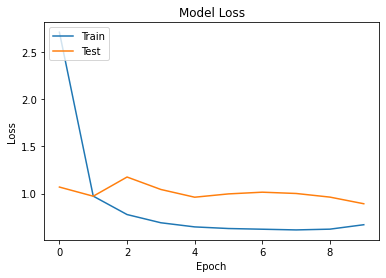

In [41]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [42]:
preds = model.predict(x_test)

In [43]:
preds = np.argmax(preds, axis=-1)
print(preds.shape)

(30, 512, 512)


## Test setinin çıktıları

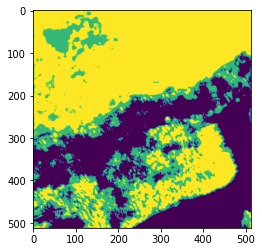

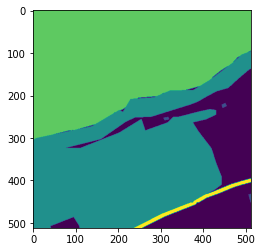

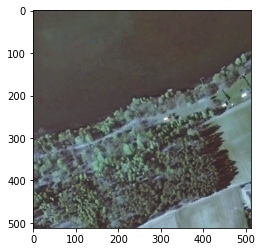

In [44]:
plt.imshow(preds[22, :, :])
plt.show()
plt.imshow(y_test[22, :, :, 0])
plt.show()
plt.imshow(x_test[22,:,:,:].astype('uint8'))
plt.show()

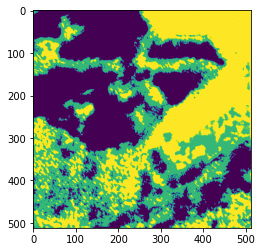

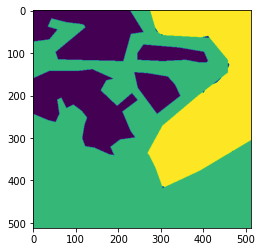

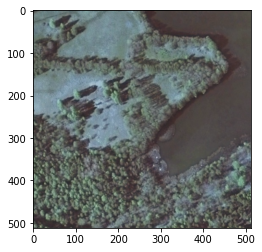

In [45]:
plt.imshow(preds[21, :, :])
plt.show()
plt.imshow(y_test[21, :, :, 0])
plt.show()
plt.imshow(x_test[21,:,:,:].astype('uint8'))
plt.show()

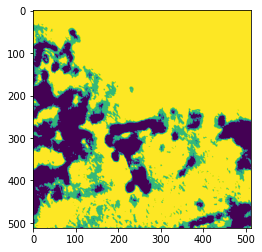

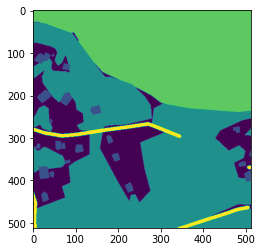

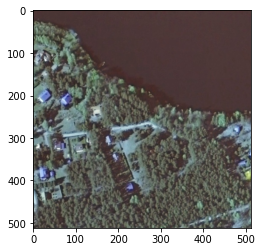

In [50]:
plt.imshow(preds[19, :, :])
plt.show()
plt.imshow(y_test[19, :, :, 0])
plt.show()
plt.imshow(x_test[19,:,:,:].astype('uint8'))
plt.show()

## Modele asıl istenen görsellerin verilmesi

In [52]:
img = cv2.imread("1.jpg",1)
img = img.reshape(1,*img.shape)
pred = model.predict(img)

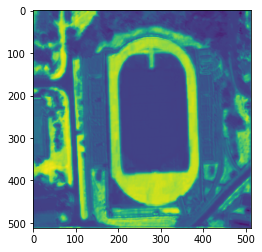

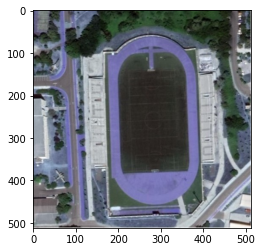

In [53]:
plt.imshow(pred[0, :, :,0])
plt.show()
plt.imshow(img[0,:,:,:].astype('uint8'))
plt.show()

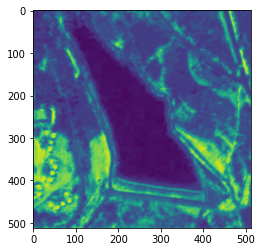

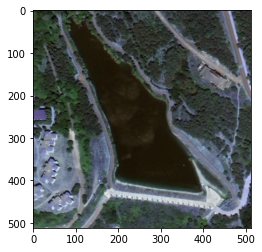

In [46]:
img = cv2.imread("2.jpg",1)
img = img.reshape(1,*img.shape)
pred = model.predict(img)

plt.imshow(pred[0, :, :,0])
plt.show()
plt.imshow(img[0,:,:,:].astype('uint8'))
plt.show()

In [48]:
results = model.evaluate(x_test, y_test_1hot, batch_size=10)
print("test loss, test acc:", results)

3/3 [==============================] - 1s 186ms/step - loss: 0.8925
test loss, test acc: 0.8925418853759766


In [49]:
results = model.evaluate(x_train, y_train_1hot, batch_size=10)
print("test loss, test acc:", results)

12/12 [==============================] - 2s 183ms/step - loss: 0.6404
test loss, test acc: 0.6404131650924683


In [47]:
model.save("first-model.h5")